In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import pyNetLogo
import numpy as np
import math  


netlogo = pyNetLogo.NetLogoLink(gui=True)
netlogo.load_model(r'E:\CAS - 7401\Final Project\Project Package\Wealth Distribution.nlogo')

Initializing the parameters

In [2]:
oldVersion = "false"
Enable_Education = "true"
enable_inheritance_tax = "true"
enable_flat_inh = "true"

num_people = 700               #at least 2 and at most 1000

max_vision = 15                  # set it between 1 to 15
metabolism_max = 25             # set it between 1 to 25

life_expectancy_min = 55         # set it between 1 to 100
life_expectancy_max =  77       # set it between 1 to 100

percent_best_land = 25          # set it between 5 to 25 
grain_growth_interval = 1       # set it between 1 to 10
num_grain_grown = 10            # set it between 1 to 10

poor_vision_max = 2             # set it between 0 to max-vision
mid_vision_max =  4             # set it between 0 to max-vision
rich_vision_max = 15              # set it between 0 to max-vision

# uneducated:0, primary education: 25, secondary education:50, tertiary education:75, graduate:100
poor_education_max   =  50           
middle_education_max =  75
rich_education_max   =  100

initial_wealth = 10


# inheritance tax
highest_thres_max_wealth = 4     # set in between 1 to 13
inheritance_threshold = 140      # set it between 80 to 140 with 10 increment size
flat_inh_tax = 50                # set it between 20 to 50 with 5 increment size
no_tax_slabs = 2                 # set it between 2 to 6
max_prog_inh_tax = 50            # set it between 0 to 50 with 5 increment size


number_of_ticks = 1500
gini = []
poor_total_wealth = []
mid_total_wealth = []
rich_total_wealth = []
totalWealth = []
turtles_wealth = []
size_poor_turtle = []
size_mid_turtle = []
size_rich_turtle = []

netlogo.command('set oldVersion {0}'.format(oldVersion))
netlogo.command('set Enable-Education {0}'.format(Enable_Education))
netlogo.command('set enable-inheritance-tax {0}'.format(enable_inheritance_tax))
netlogo.command('set enable-flat-inh {0}'.format(enable_flat_inh))



netlogo.command('set num-people {0}'.format(num_people))

netlogo.command('set max-vision {0}'.format(max_vision))

netlogo.command('set metabolism-max {0}'.format(metabolism_max))

netlogo.command('set life-expectancy-min {0}'.format(life_expectancy_min))
netlogo.command('set life-expectancy-max {0}'.format(life_expectancy_max))

netlogo.command('set percent-best-land {0}'.format(percent_best_land))
netlogo.command('set grain-growth-interval {0}'.format(grain_growth_interval))
netlogo.command('set num-grain-grown {0}'.format(num_grain_grown))

# set class-based vision
netlogo.command('set poor-vision-max {0}'.format(poor_vision_max))
netlogo.command('set mid-vision-max {0}'.format(mid_vision_max))
netlogo.command('set rich-vision-max {0}'.format(rich_vision_max))


#set education level of each class
netlogo.command('set poor-education-max {0}'.format(poor_education_max))
netlogo.command('set middle-education-max {0}'.format(middle_education_max))
netlogo.command('set rich-education-max {0}'.format(rich_education_max))

#set initial wealth factor
netlogo.command('set initial-wealth {0}'.format(initial_wealth))

# inheritance tax
netlogo.command('set highest-thres-max-wealth {0}'.format(highest_thres_max_wealth))
netlogo.command('set inheritance-threshold {0}'.format(inheritance_threshold))
netlogo.command('set flat-inh-tax {0}'.format(flat_inh_tax))
netlogo.command('set no-tax-slabs {0}'.format(no_tax_slabs))
netlogo.command('set max-prog-inh-tax {0}'.format(max_prog_inh_tax))

In [3]:
netlogo.command('setup')

for i in range (number_of_ticks):
    
    netlogo.command('go')

    lorenz_points = netlogo.report('lorenz-points')
    
    gini.append(((netlogo.report('gini-index-reserve'))/num_people)/0.5)
    
    poor_total_wealth.append(netlogo.report('sum [wealth] of turtles with [color = red]'))
    
    mid_total_wealth.append(netlogo.report('sum [wealth] of turtles with [color = green]'))
  
    rich_total_wealth.append(netlogo.report('sum [wealth] of turtles with [color = blue]'))

    totalWealth.append(netlogo.report('sum [wealth] of turtles'))
    
    turtles_wealth = netlogo.report('[wealth] of turtles')
    
    size_poor_turtle.append(netlogo.report('count turtles with [color = red]'))
    
    size_mid_turtle.append(netlogo.report('count turtles with [color = green]'))
    
    size_rich_turtle.append(netlogo.report('count turtles with [color = blue]'))


In [4]:
# print("lorenz-points: ", len(lorenz_points) ,lorenz_points)

In [5]:
# print("gini: ", len(gini), gini)

Plotting Lorenz Curve and Computing Gini Index

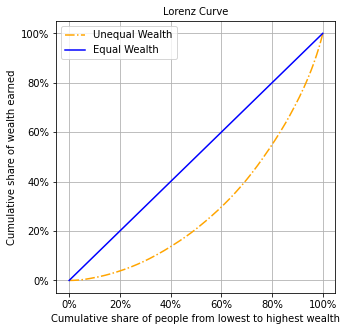

In [6]:
plt.figure(figsize = (5, 5))

F = [0,100]
G = [0, 100]
cumulative_share_people = []
temp = 0

for i in range(1, num_people + 1):
  cumulative_share_people.append((i/num_people)*100)
  
plt.rc('font', size=10)
# Set the axes title font size
plt.rc('axes', titlesize=10)
# Set the axes labels font size
plt.rc('axes', labelsize=10)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=10)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=10)
# Set the legend font size
plt.rc('legend', fontsize=10)
# Set the font size of the figure title
plt.rc('figure', titlesize=10)



plt.plot(cumulative_share_people, lorenz_points ,  color = "orange", linestyle ='-.', label = 'Unequal Wealth')
plt.plot(F, G, color = "blue", label = 'Equal Wealth')
plt.grid()
plt.legend()
plt.xlabel("Cumulative share of people from lowest to highest wealth")
plt.ylabel("Cumulative share of wealth earned")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
plt.title("Lorenz Curve")
plt.show()

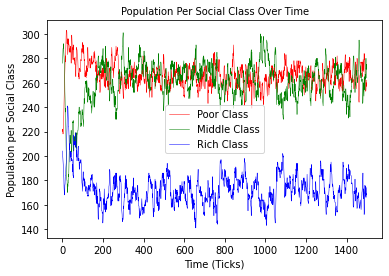

In [7]:
plt.plot(size_poor_turtle, color='red', linewidth = "0.5" ,label = 'Poor Class') #plot the data
plt.plot(size_mid_turtle, color='green', linewidth = "0.5",label = 'Middle Class') #plot the data
plt.plot(size_rich_turtle, color='blue', linewidth = "0.5",label = 'Rich Class') #plot the data

plt.legend()
plt.title('Population Per Social Class Over Time') #set the label for y axis
plt.xlabel('Time (Ticks)') #set the label for x-axis
plt.ylabel("Population per Social Class") #set the title of the graph
plt.show() #display the graph

Plotting Class Histogram

In [8]:
number_of_poor_class = netlogo.report('count turtles with [color = red]')
number_of_middle_class = netlogo.report('count turtles with [color = green]')
number_of_rich_class = netlogo.report('count turtles with [color = blue]')

# print(number_of_poor_class, '\n', number_of_middle_class,'\n' ,number_of_rich_class)

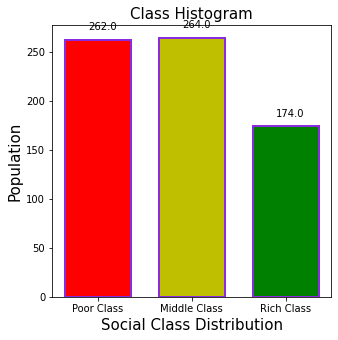

In [9]:
# Preparing the data to plot
classes = ['Poor Class', 'Middle Class', 'Rich Class'] 
population = [number_of_poor_class,number_of_middle_class,number_of_rich_class]


plt.figure(figsize=[5, 5])

# Creating a bar chart with bars of different color
plt.bar(classes, population, width=0.7, edgecolor='blueviolet',
        color=['r', 'y', 'g', 'b', 'c', 'k', 
               'olive', 'gray', 'pink', 'maroon'], linewidth=2)
# annotation
for i in range(3):
 plt.annotate(population[i], (i - 0.1 ,population[i] + 10),fontsize = 10)

plt.title('Class Histogram', fontsize=15)
plt.xlabel('Social Class Distribution', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.show()


In [10]:
last_gini_index = gini[::-1][0]
print(last_gini_index) 

0.4156124201392124


Plotting Gini Coefficient 

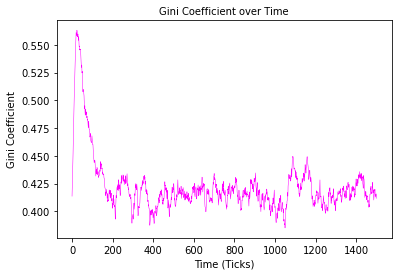

In [11]:
plt.plot(gini, color='magenta', linewidth = "0.5") #plot the data
# plt.xticks(range(0,len(gini)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('Gini Coefficient') #set the label for y axis
plt.xlabel('Time (Ticks)') #set the label for x-axis
plt.title("Gini Coefficient over Time") #set the title of the graph
plt.show() #display the graph

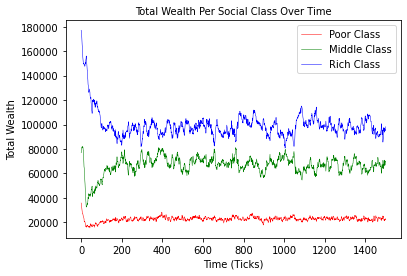

In [12]:
plt.plot(poor_total_wealth, color='red', linewidth = "0.5" ,label = 'Poor Class') #plot the data
plt.plot(mid_total_wealth, color='green', linewidth = "0.5",label = 'Middle Class') #plot the data
plt.plot(rich_total_wealth, color='blue', linewidth = "0.5",label = 'Rich Class') #plot the data

plt.legend()
plt.title('Total Wealth Per Social Class Over Time') #set the label for y axis
plt.xlabel('Time (Ticks)') #set the label for x-axis
plt.ylabel("Total Wealth") #set the title of the graph
plt.show() #display the graph

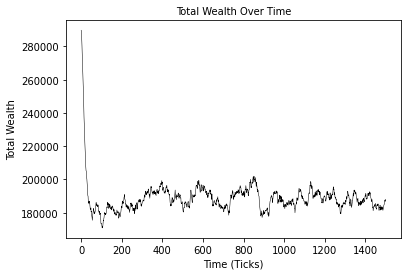

In [13]:
plt.plot(totalWealth, color='black', linewidth = "0.5" ,label = 'Poor Class') #plot the data


plt.title('Total Wealth Over Time') #set the label for y axis
plt.xlabel('Time (Ticks)') #set the label for x-axis
plt.ylabel("Total Wealth") #set the title of the graph
plt.show() #display the graph